In [90]:
!pip install periodicity_detection

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
python-lsp-black 1.2.1 requires black>=22.3.0, but you have black 0.0 which is incompatible.
sberpm 2.6.2 requires typing-extensions==4.7.*, but you have typing-extensions 4.12.2 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/230.8 kB ? eta -:--:--
     - -------------------------------------- 10.2/230.8 kB ? eta -:--:--
     ---------------------------- --------- 174.1/230.8 kB 2.1 MB/s eta 0:00:01
     -------------------------------------- 230.8/230.8 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/56.8 kB ? eta -:--:--
   ---------------------------------------- 56.8/56.8 kB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/126.6 kB ? eta -:--:--
   ---------------------------------------- 126.6/126.6 kB ? eta 0:00:00
   ---------------------------------------- 0.0/63.8 kB ? eta -:--:--
   ---------------------------------------- 63.8/63.8 kB ? eta 0:00:00
  Created wheel for spectrum: filename=spectrum-0.8.1-cp311-cp311-win_amd64.whl size=228108 sha256=af5b888f3d45ecd1ea06dfb616e913599954908429b4133299487f9f6b

In [91]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import periodicity_detection as pyd

mpl.rcParams['figure.figsize'] = (30, 10)
mpl.rcParams['axes.grid'] = False

ContextualVersionConflict: (platformdirs 2.5.2 (c:\users\deniz\anaconda3\lib\site-packages), Requirement.parse('platformdirs<5.0.0,>=4.2.0'), {'easydev'})

In [2]:
%run ../preset.py

In [3]:
df = pd.read_parquet("../../prepare_data/data.gzip")

In [4]:
df.head(3)

,subject_name,actual_consumption,datetime
index,,,
2011-01-01 00:00:00,Алтайский край,1313.0,2011-01-01 00:00:00
2011-01-01 00:00:00,Амурская область,870.0,2011-01-01 00:00:00
2011-01-01 00:00:00,Архангельская область,970.0,2011-01-01 00:00:00


In [ ]:

# grouped = df.groupby('subject_name')

# for region, group in grouped:
#     plt.figure(figsize=(10, 6))
#     plt.plot(group.index, group['actual_consumption'])
#     plt.title(f'Electro Consumption for {region}')
#     plt.xlabel('Index')
#     plt.ylabel('Electro Consumption')
#     plt.close()

In [6]:
type(df.datetime[0])

str

In [10]:
date_time = pd.to_datetime(df["datetime"])

In [12]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [11]:
date_time.head()

index
2011-01-01 00:00:00   2011-01-01
2011-01-01 00:00:00   2011-01-01
2011-01-01 00:00:00   2011-01-01
2011-01-01 00:00:00   2011-01-01
2011-01-01 00:00:00   2011-01-01
Name: datetime, dtype: datetime64[ns]

In [25]:
timestamp_s[0] == timestamp_s[70]

True

In [67]:
day = 24 * 60 * 60
week = day * 7
month = day * 31
year = (365.2425) * day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Week sin'] = np.sin(timestamp_s * (2 * np.pi / week))
df['Week cos'] = np.cos(timestamp_s * (2 * np.pi / week))
df['Month sin'] = np.sin(timestamp_s * (2 * np.pi / week))
df['Month cos'] = np.cos(timestamp_s * (2 * np.pi / week))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [32]:
df.head()

,subject_name,actual_consumption,datetime,Day sin,Day cos,Year sin,Year cos
index,,,,,,,
2011-01-01 00:00:00,Алтайский край,1313.0,2011-01-01 00:00:00,-7.057106e-12,1.0,0.000989,1.0
2011-01-01 00:00:00,Амурская область,870.0,2011-01-01 00:00:00,-7.057106e-12,1.0,0.000989,1.0
2011-01-01 00:00:00,Архангельская область,970.0,2011-01-01 00:00:00,-7.057106e-12,1.0,0.000989,1.0
2011-01-01 00:00:00,Астраханская область,504.0,2011-01-01 00:00:00,-7.057106e-12,1.0,0.000989,1.0
2011-01-01 00:00:00,Белгородская область,1592.0,2011-01-01 00:00:00,-7.057106e-12,1.0,0.000989,1.0


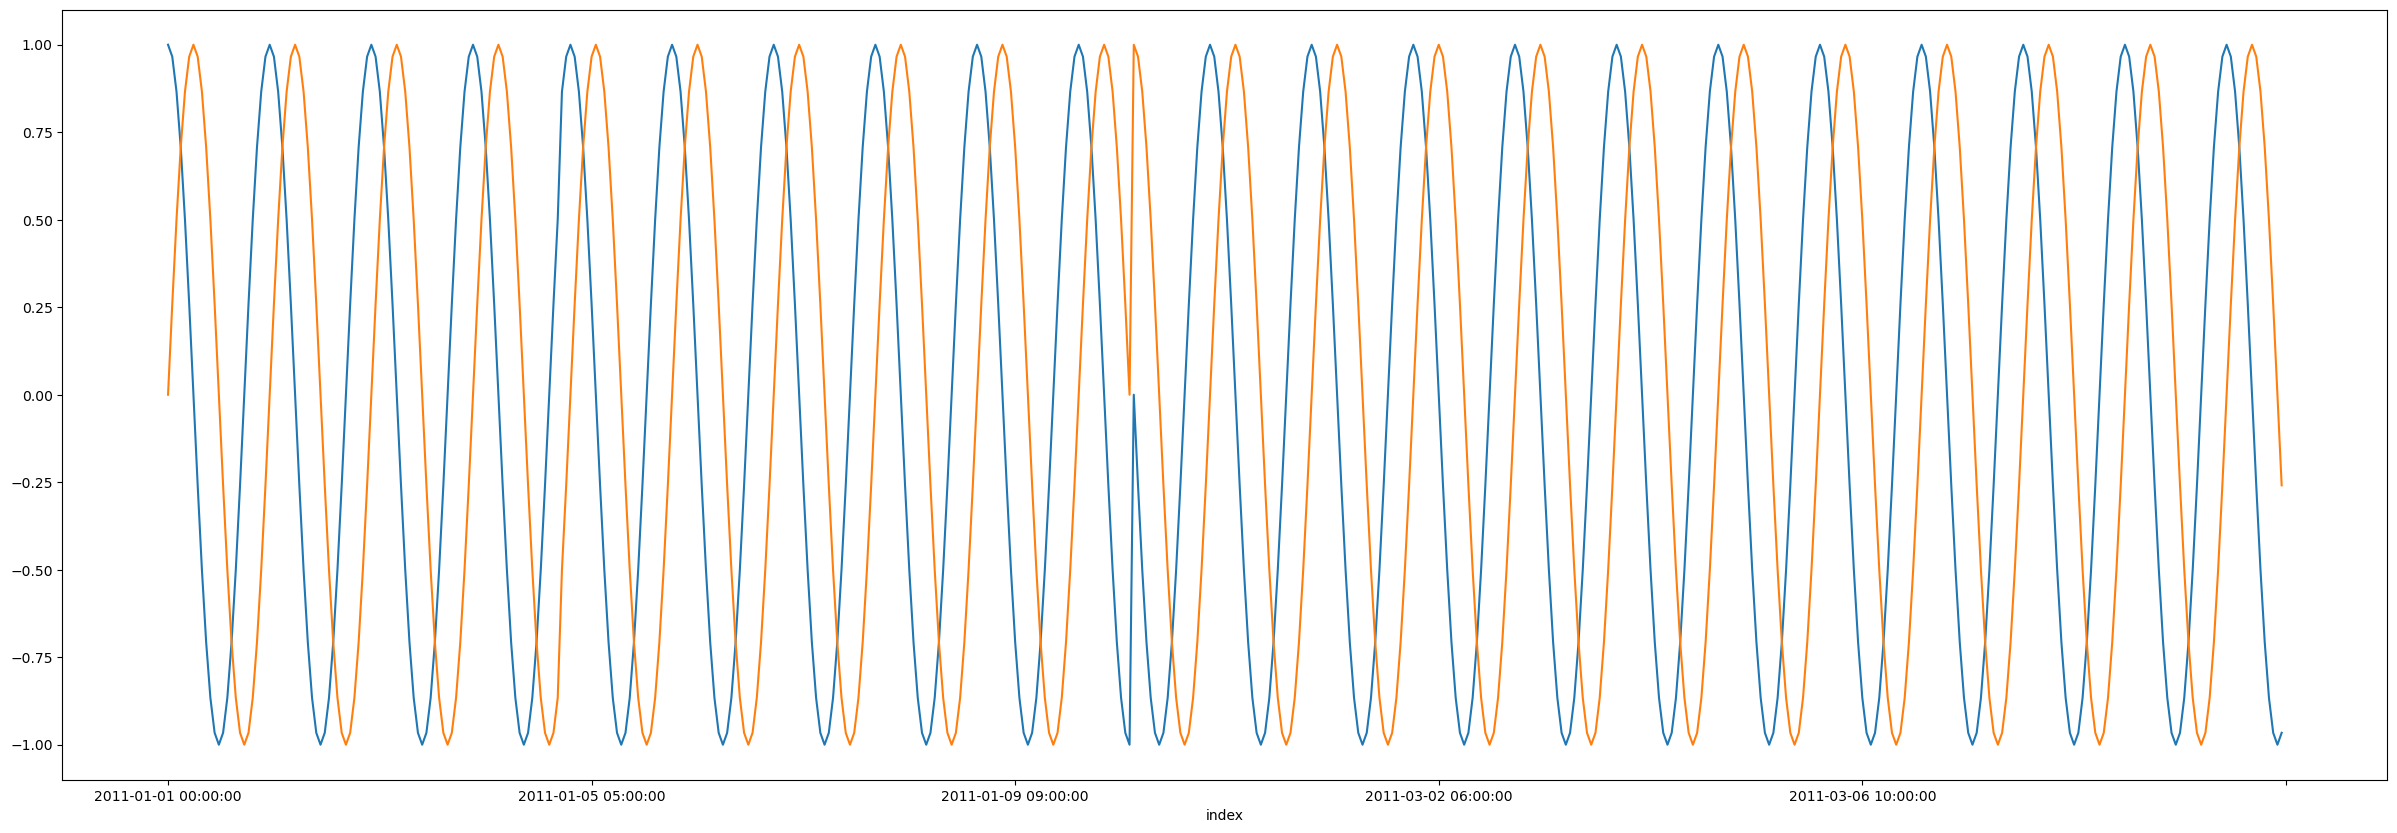

In [59]:
df[df["subject_name"] == "Алтайский край"]["Day cos"].iloc[:500].plot()
df[df["subject_name"] == "Алтайский край"]["Day sin"].iloc[:500].plot();

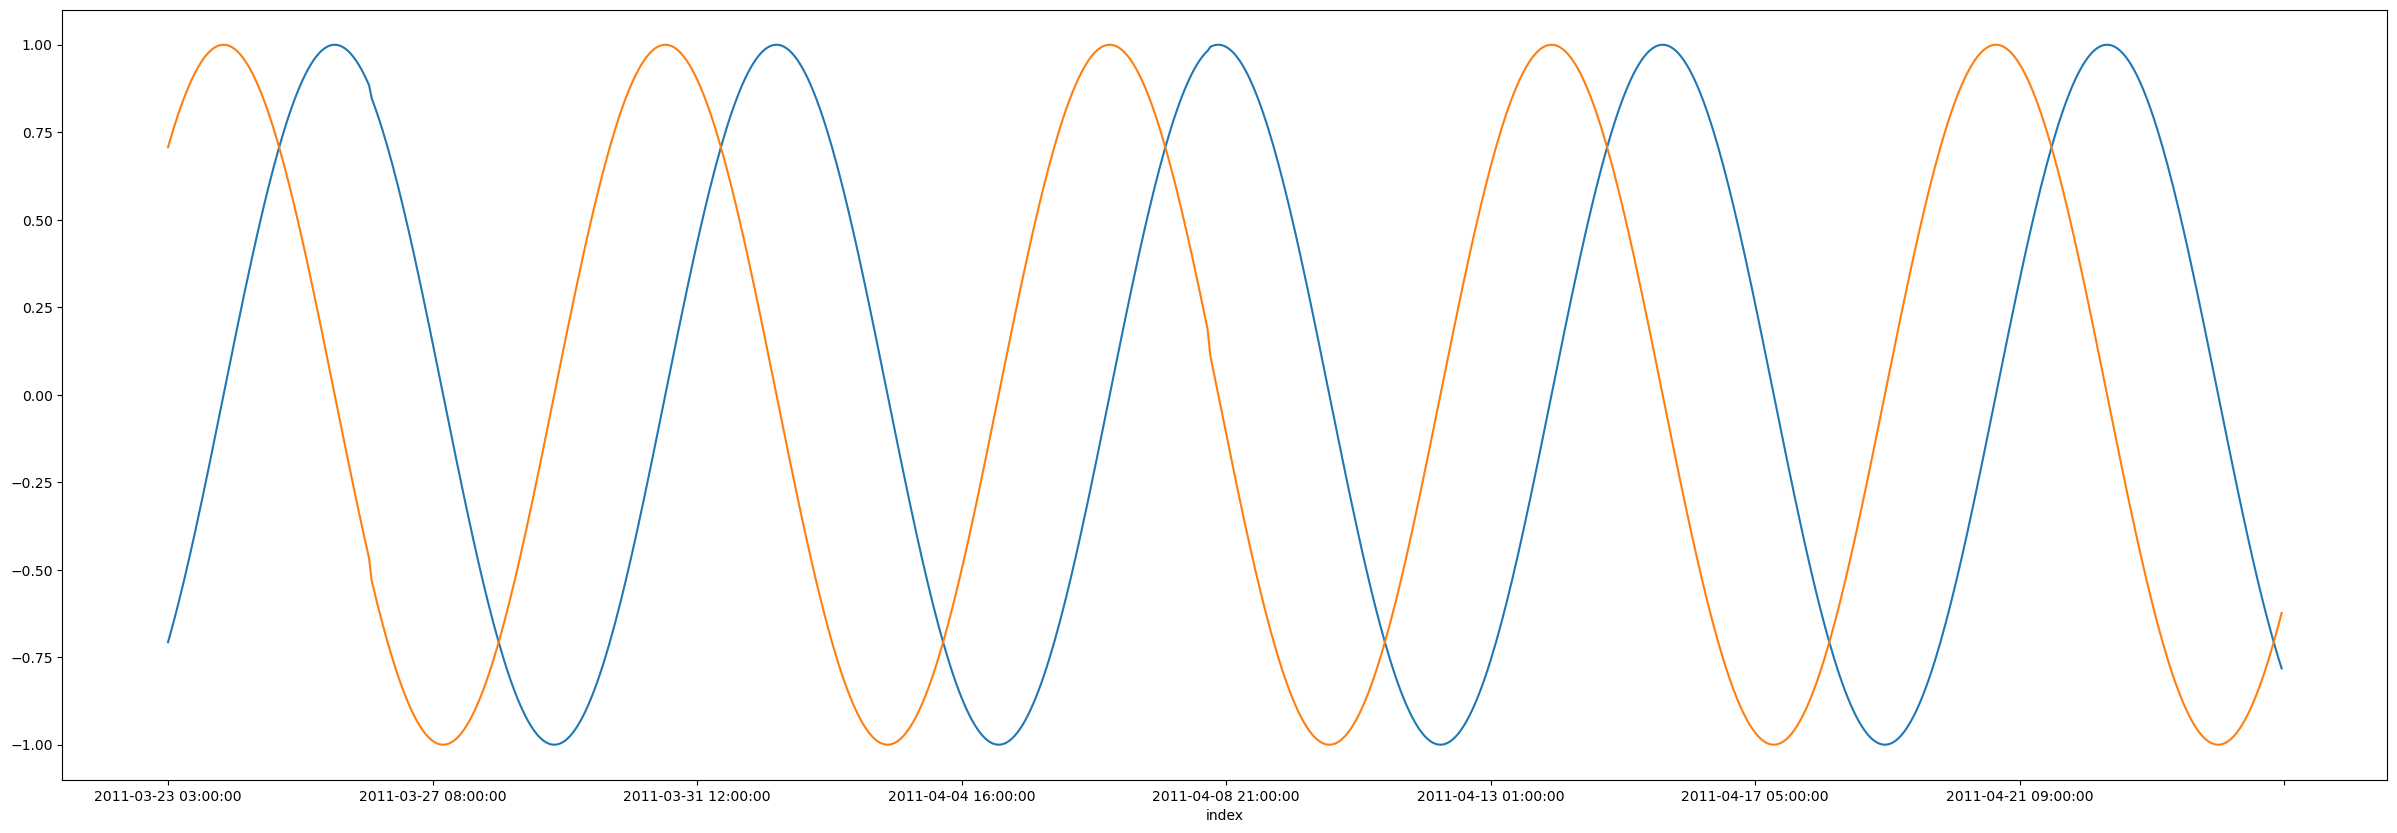

In [65]:
df[df["subject_name"] == "Алтайский край"]["Week sin"].iloc[800:1600].plot()
df[df["subject_name"] == "Алтайский край"]["Week cos"].iloc[800:1600].plot();

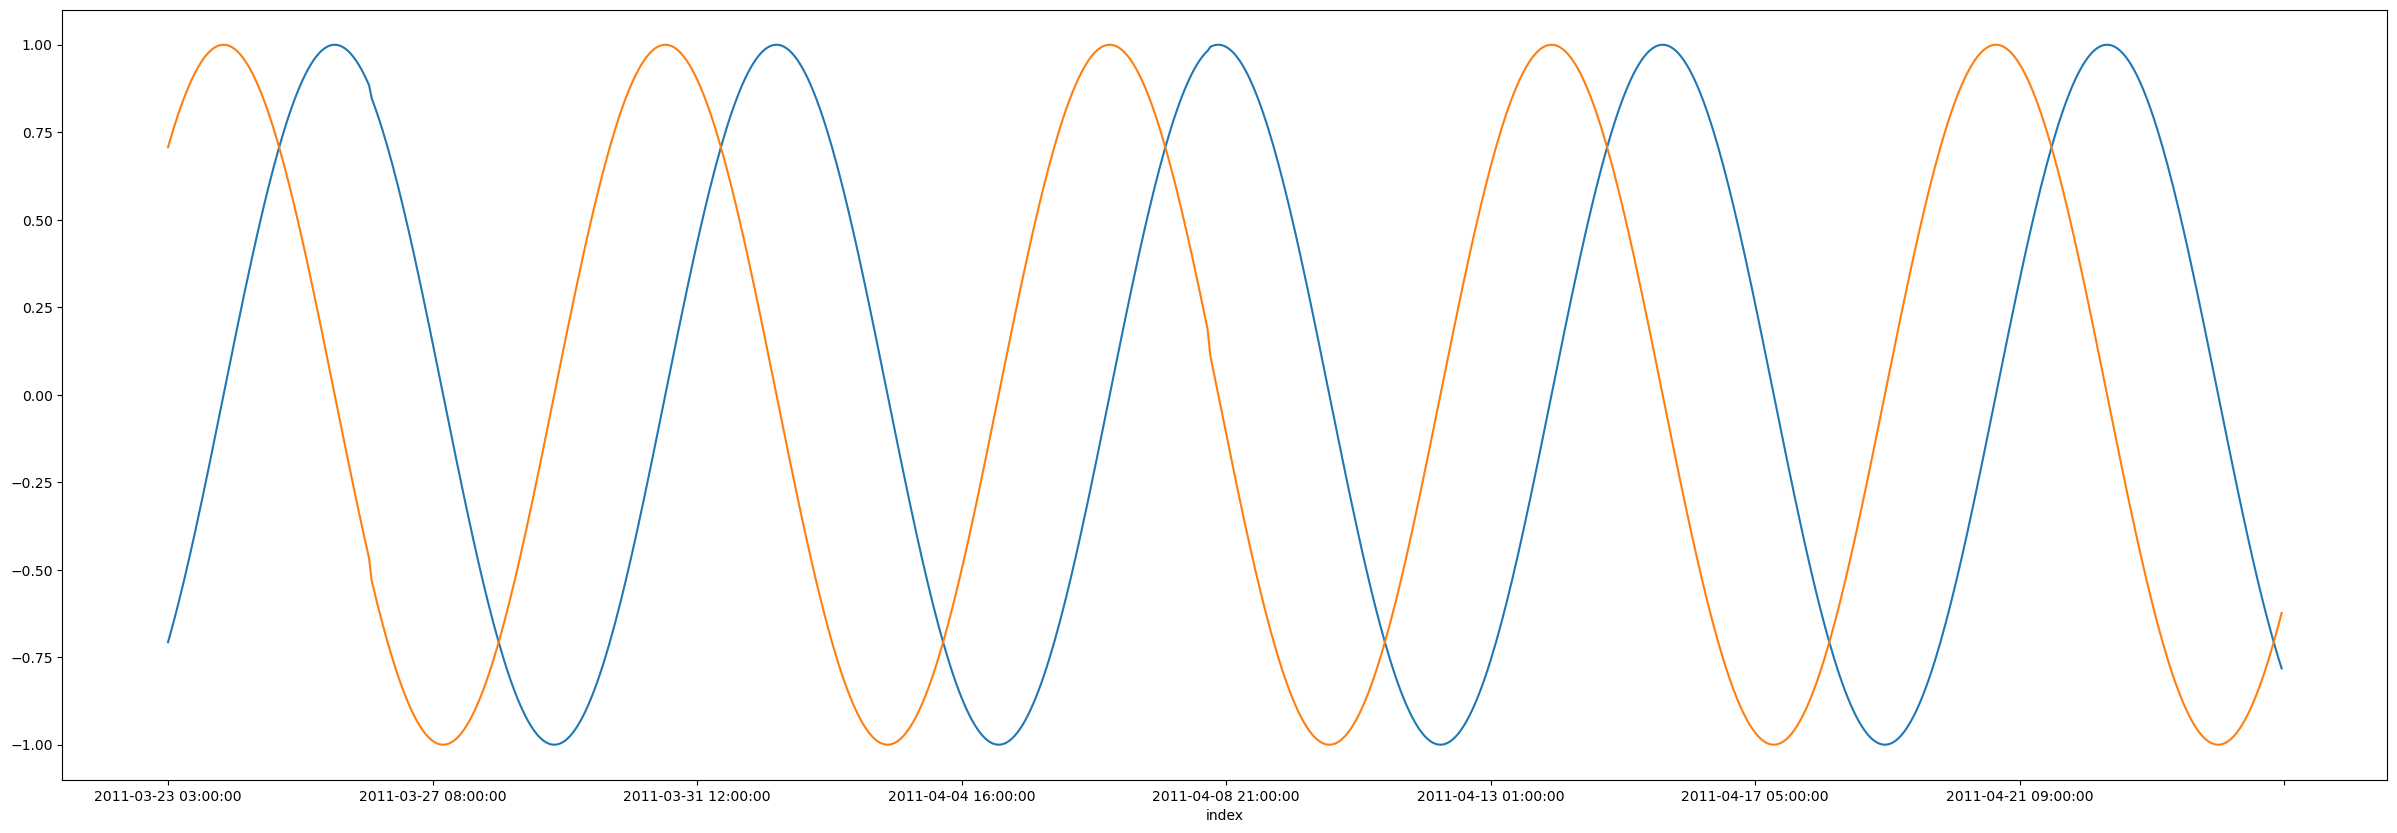

In [68]:
df[df["subject_name"] == "Алтайский край"]["Month sin"].iloc[800:1600].plot()
df[df["subject_name"] == "Алтайский край"]["Month cos"].iloc[800:1600].plot();

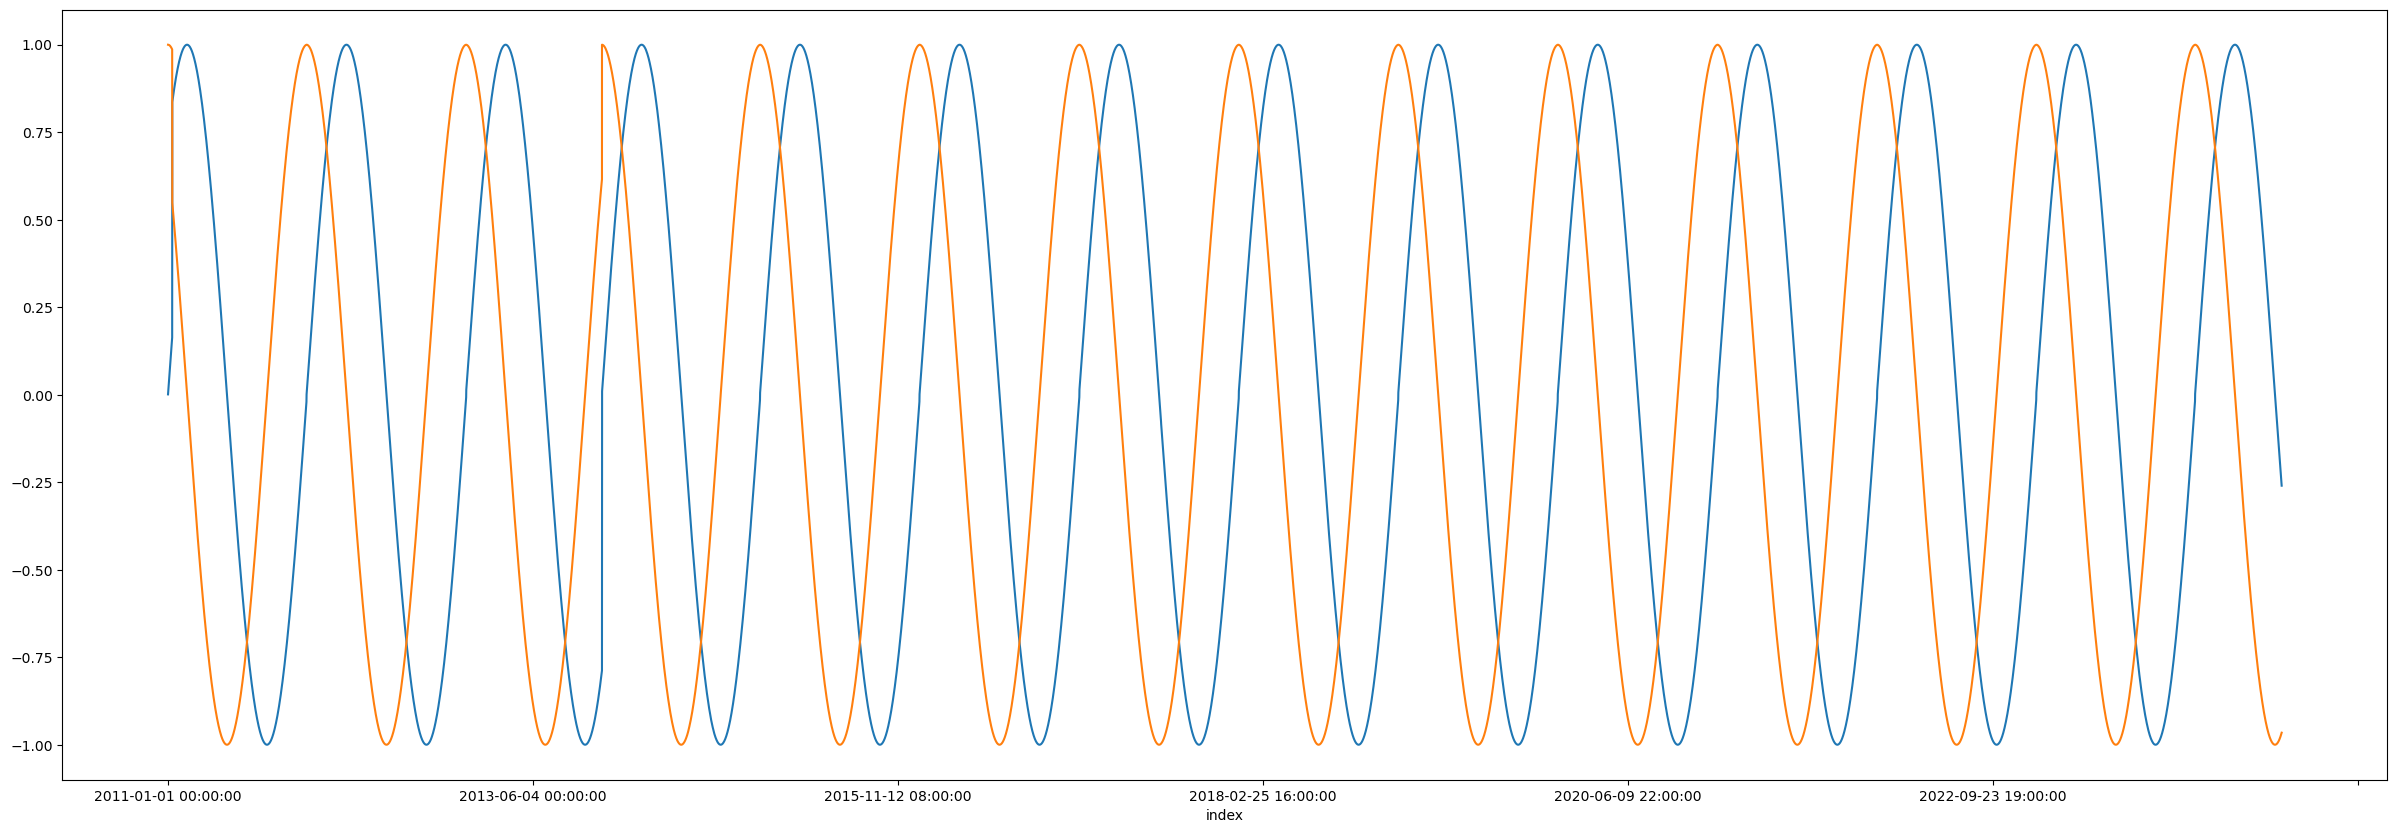

In [69]:
df[df["subject_name"] == "Алтайский край"]["Year sin"].iloc[:].plot()
df[df["subject_name"] == "Алтайский край"]["Year cos"].iloc[:].plot();

C:\Users\Deniz\AppData\Local\Temp\ipykernel_8152\4128770801.py:17: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, max(plt.xlim())])


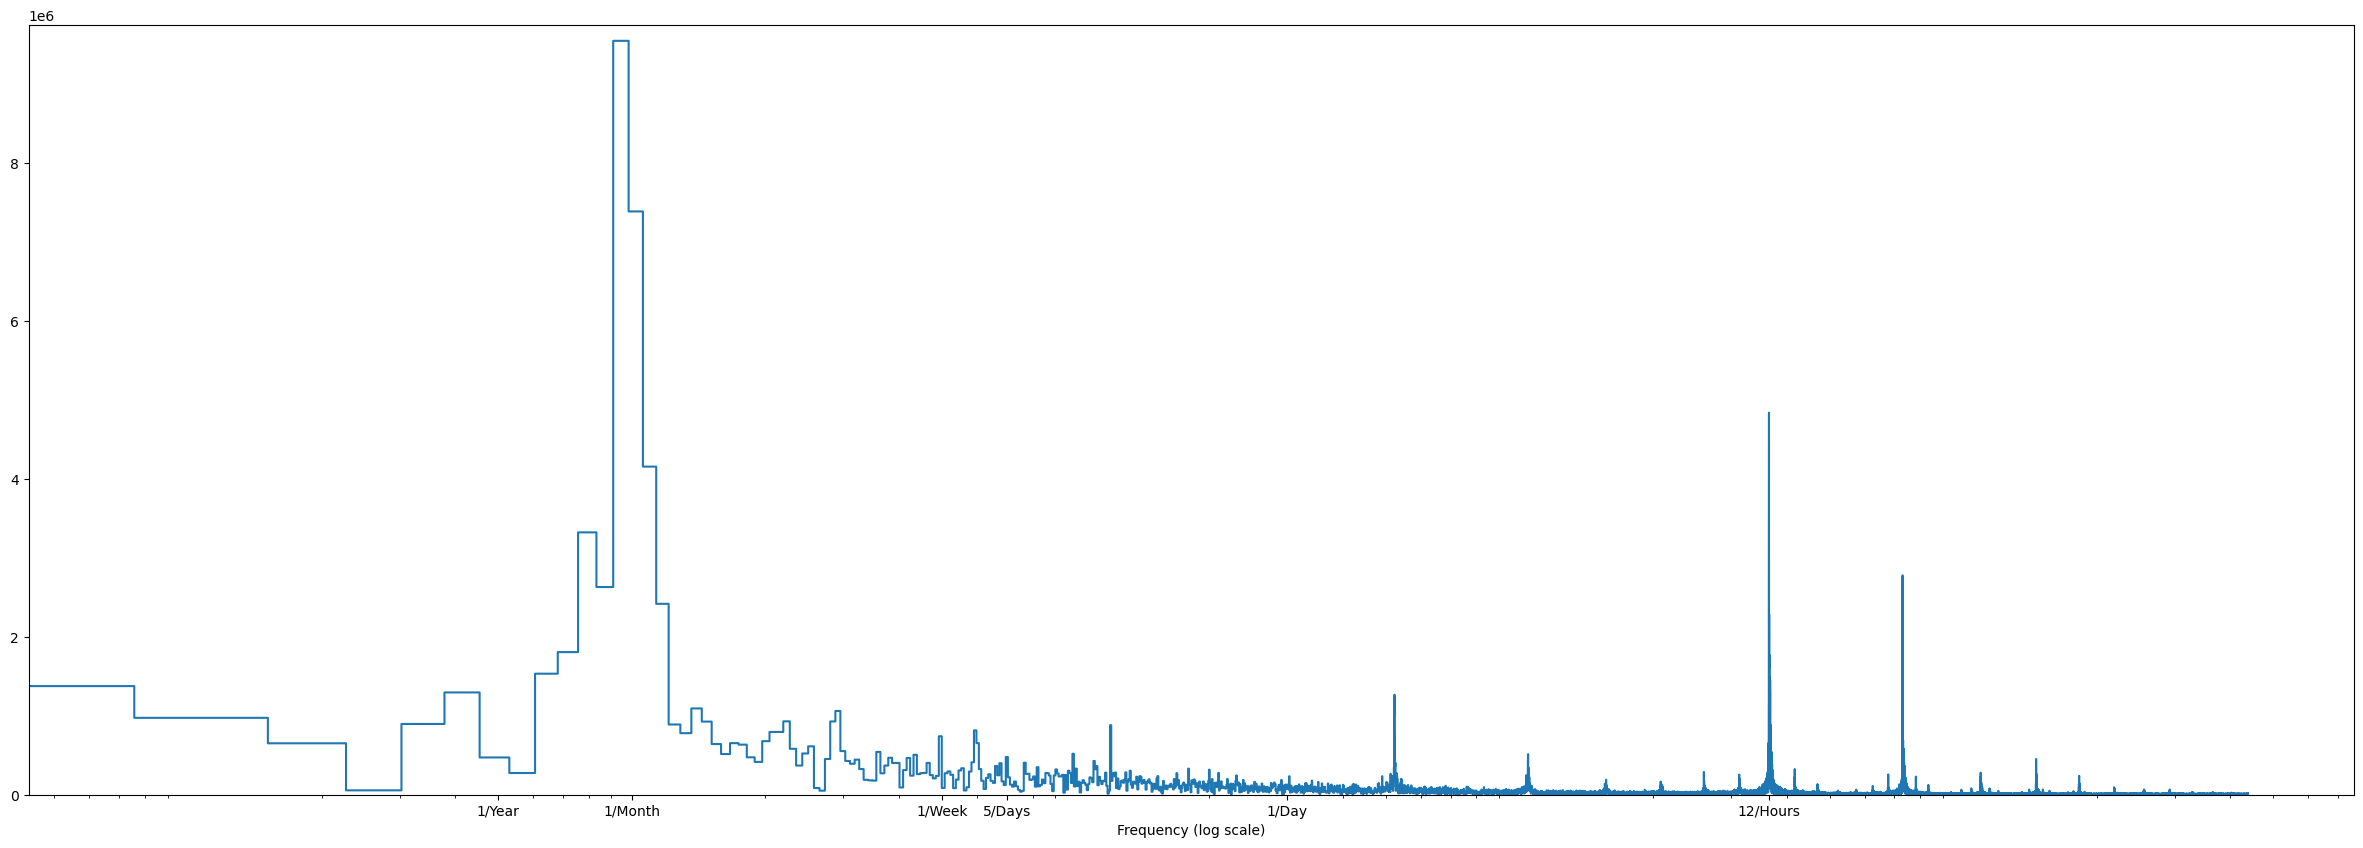

In [88]:
fft = tf.signal.rfft(df[df["subject_name"] == "Алтайский край"]['actual_consumption'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df[df["subject_name"] == "Алтайский край"]['actual_consumption'])
hours_per_year = 24*365.2524
# weeks_per_year = 
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset

plt.step(f_per_year, np.abs(fft))

plt.xscale('log')

plt.ylim(0, 9750000)

plt.xlim([0, max(plt.xlim())])

plt.xticks(
           [0.5, 1, 5, 7, 30, 365.2524],
           labels=["1/Year", "1/Month", "1/Week", '5/Days', '1/Day', '12/Hours']
          )

_ = plt.xlabel('Frequency (log scale)');